# $n$-step SARSA
- Algorithms from ```pp. 119 - 120``` in Sutton & Barto 2017

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn, random

from gridWorldEnvironment import GridWorld

In [3]:
# creating gridworld environment
gw = GridWorld(gamma = .9)

In [59]:
def state_action_value(env):
    q = dict()
    for state, action, next_state, reward in env.transitions:
        q[(state, action)] = np.random.normal()
    return q

In [60]:
state_action_value(gw)

{(1, 'D'): -0.7030356916846013,
 (1, 'L'): -0.324895205360978,
 (1, 'R'): -1.1734677062639605,
 (1, 'U'): -0.16629963855724197,
 (2, 'D'): -0.23584377637184736,
 (2, 'L'): 1.4901073639401272,
 (2, 'R'): 0.6934460377797941,
 (2, 'U'): 0.8636095279329232,
 (3, 'D'): -1.609655563626268,
 (3, 'L'): 0.9311445594943784,
 (3, 'R'): 0.8985239654154085,
 (3, 'U'): -0.4080380875477237,
 (4, 'D'): -0.17538315728764214,
 (4, 'L'): -1.2559883445535147,
 (4, 'R'): -0.8940561790577116,
 (4, 'U'): 0.21171585977065896,
 (5, 'D'): 0.22188493818420746,
 (5, 'L'): 0.2624753401534311,
 (5, 'R'): -0.47795119564774396,
 (5, 'U'): 1.4805795529303916,
 (6, 'D'): -0.9419847476859503,
 (6, 'L'): -1.2209175101970824,
 (6, 'R'): 0.39723157885321236,
 (6, 'U'): 0.9834147564834003,
 (7, 'D'): 0.6846683809603875,
 (7, 'L'): -3.065126625005005,
 (7, 'R'): -0.9160309917151935,
 (7, 'U'): 0.6802182059638696,
 (8, 'D'): -2.079437344850202,
 (8, 'L'): -0.7871927916410061,
 (8, 'R'): 0.05422301115908965,
 (8, 'U'): -0.3719

In [5]:
def generate_greedy_policy(env, Q):
    pi = dict()
    for state in env.states:
        actions = []
        q_values = []
        prob = []
        
        for a in env.actions:
            actions.append(a)
            q_values.append(Q[state,a])   
        for i in range(len(q_values)):
            if i == np.argmax(q_values):
                prob.append(1)
            else:
                prob.append(0)       
                
        pi[state] = (actions, prob)
    return pi

In [6]:
def e_greedy(env, e, q, state):
    actions = env.actions
    action_values = []
    prob = []
    for action in actions:
        action_values.append(q[(state, action)])
    for i in range(len(action_values)):
        if i == np.argmax(action_values):
            prob.append(1 - e + e/len(action_values))
        else:
            prob.append(e/len(action_values))
    return actions, prob

In [7]:
# e-greedy policy is an extension of e_greedy()
def generate_e_greedy_policy(env, e, Q):
    pi = dict()
    for state in env.states:
        pi[state] = e_greedy(env, e, Q, state)
    return pi

In [8]:
generate_e_greedy_policy(gw, 0.1, state_action_value(gw))

{1: (('U', 'D', 'L', 'R'), [0.025, 0.025, 0.925, 0.025]),
 2: (('U', 'D', 'L', 'R'), [0.025, 0.025, 0.925, 0.025]),
 3: (('U', 'D', 'L', 'R'), [0.025, 0.025, 0.925, 0.025]),
 4: (('U', 'D', 'L', 'R'), [0.025, 0.025, 0.025, 0.925]),
 5: (('U', 'D', 'L', 'R'), [0.025, 0.025, 0.925, 0.025]),
 6: (('U', 'D', 'L', 'R'), [0.025, 0.925, 0.025, 0.025]),
 7: (('U', 'D', 'L', 'R'), [0.025, 0.025, 0.925, 0.025]),
 8: (('U', 'D', 'L', 'R'), [0.025, 0.925, 0.025, 0.025]),
 9: (('U', 'D', 'L', 'R'), [0.025, 0.925, 0.025, 0.025]),
 10: (('U', 'D', 'L', 'R'), [0.025, 0.025, 0.025, 0.925]),
 11: (('U', 'D', 'L', 'R'), [0.925, 0.025, 0.025, 0.025]),
 12: (('U', 'D', 'L', 'R'), [0.025, 0.925, 0.025, 0.025]),
 13: (('U', 'D', 'L', 'R'), [0.025, 0.025, 0.925, 0.025]),
 14: (('U', 'D', 'L', 'R'), [0.025, 0.025, 0.025, 0.925])}

### $n$-step SARSA: On-policy TD Control

In [61]:
def n_step_sarsa(env, epsilon, alpha, n, num_iter, learn_pi = True):
    Q = state_action_value(env)
    pi = generate_e_greedy_policy(env, epsilon, Q)
    for _ in range(num_iter):
        current_state = np.random.choice(env.states)
        action = np.random.choice(pi[current_state][0], p = pi[current_state][1])
        state_trace, action_trace, reward_trace  = [current_state], [action], [0]
        t, T = 0, 10000
        while True:
            if t < T:    
                next_state, reward = env.state_transition(current_state, action)
                state_trace.append(next_state)
                reward_trace.append(reward)
                if next_state == 0:
                    T = t + 1
                else:  
                    action = np.random.choice(pi[next_state][0], p = pi[next_state][1])
                    action_trace.append(action)
                    
            tau = t - n + 1   # tau designates the time step of estimate being update
            if tau >= 0:
                G = 0
                for i in range(tau + 1, min([tau + n, T]) + 1):
                    G += (env.gamma ** (i - tau - 1)) * reward_trace[i-1]
                if tau + n < T:
                    G += (env.gamma ** n) * Q[state_trace[tau + n], action_trace[tau + n]]
                Q[state_trace[tau], action_trace[tau]] += alpha * (G - Q[state_trace[tau], action_trace[tau]])
                
                # current policy, pi, can be learned each step, or not
                if learn_pi:
                    pi[state_trace[tau]] = e_greedy(env, epsilon, Q, state_trace[tau])
            current_state = next_state    
            
            if tau == (T-1):
                break
            t += 1
            
    return pi, Q

In [62]:
pi, Q = n_step_sarsa(gw, 0.2, 0.5, 3, 1000)

In [63]:
pi

{1: (('U', 'D', 'L', 'R'), [0.05, 0.05, 0.8500000000000001, 0.05]),
 2: (('U', 'D', 'L', 'R'), [0.05, 0.05, 0.8500000000000001, 0.05]),
 3: (('U', 'D', 'L', 'R'), [0.05, 0.8500000000000001, 0.05, 0.05]),
 4: (('U', 'D', 'L', 'R'), [0.8500000000000001, 0.05, 0.05, 0.05]),
 5: (('U', 'D', 'L', 'R'), [0.8500000000000001, 0.05, 0.05, 0.05]),
 6: (('U', 'D', 'L', 'R'), [0.05, 0.8500000000000001, 0.05, 0.05]),
 7: (('U', 'D', 'L', 'R'), [0.05, 0.8500000000000001, 0.05, 0.05]),
 8: (('U', 'D', 'L', 'R'), [0.8500000000000001, 0.05, 0.05, 0.05]),
 9: (('U', 'D', 'L', 'R'), [0.05, 0.8500000000000001, 0.05, 0.05]),
 10: (('U', 'D', 'L', 'R'), [0.05, 0.05, 0.05, 0.8500000000000001]),
 11: (('U', 'D', 'L', 'R'), [0.05, 0.8500000000000001, 0.05, 0.05]),
 12: (('U', 'D', 'L', 'R'), [0.05, 0.05, 0.05, 0.8500000000000001]),
 13: (('U', 'D', 'L', 'R'), [0.05, 0.05, 0.05, 0.8500000000000001]),
 14: (('U', 'D', 'L', 'R'), [0.05, 0.05, 0.05, 0.8500000000000001])}

### Visualizing policy

In [65]:
def show_policy(pi, env):
    temp = np.zeros(len(env.states) + 2)
    for s in env.states:
        a = pi[s][0][np.argmax(pi[s][1])]
        if a == "U":
            temp[s] = 0.25
        elif a == "D":
            temp[s] = 0.5
        elif a == "R":
            temp[s] = 0.75
        else:
            temp[s] = 1.0
            
    temp = temp.reshape(4,4)
    ax = seaborn.heatmap(temp, cmap = "prism", linecolor="#282828", cbar = False, linewidths = 0.1)
    plt.show()

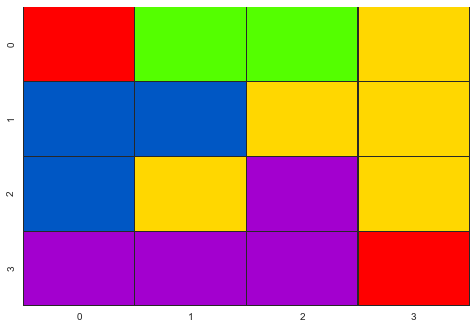

In [66]:
### RED = TERMINAL (0)
### GREEN = LEFT
### BLUE = UP
### PURPLE = RIGHT
### ORANGE = DOWN

show_policy(pi, gw)